In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import requests
from io import BytesIO

In [2]:
def get_house_attributes(iPath):
    column_names = ["Bedrooms", "Bathrooms", "Area", "Zipcode", "Price"]
    houses = pd.read_csv(iPath, sep=" ", header=None, names=column_names)
    return houses

In [3]:
houses = get_house_attributes("HousesInfo.txt")

In [4]:
houses.isnull().sum()

Bedrooms     0
Bathrooms    0
Area         0
Zipcode      0
Price        0
dtype: int64

In [5]:
corrmat = houses.corr()

<AxesSubplot:>

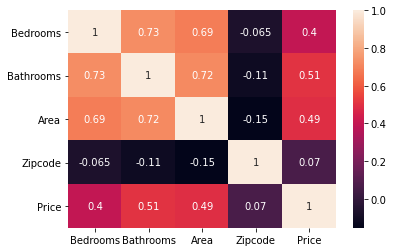

In [6]:

sns.heatmap(corrmat, annot=True)

In [21]:
from PIL import Image
import math

# Path to the folder containing the images
folder_path = "C:/Users/gebruiker/Documents/imagesCC/"

# Path to the folder where the grids will be saved
save_folder_path = "C:/Users/gebruiker/Documents/imagesCC/assets/"

# Get a list of all photo files in the folder
photo_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".jpg")])

# Calculate the number of grids to be created
num_grids = math.ceil(len(photo_files) / 4)

# Iterate over the number of grids
for grid_index in range(num_grids):
    # Calculate the starting index for the current grid
    start_index = grid_index * 4

    # Create a new figure for the current grid
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

    # Iterate over the photos in the current grid
    for i, label in enumerate(["bathroom", "bedroom", "frontal", "kitchen"]):
        # Calculate the index of the current photo
        index = start_index + i

        # Check if the current photo index is within the total number of photos
        if index < len(photo_files):
            # Load the photo using PIL
            photo_path = os.path.join(folder_path, f"{grid_index + 1}_{label}.jpg")
            photo = Image.open(photo_path)

            # Calculate the current row and column index
            row = i // 2
            col = i % 2

            # Plot the photo in the corresponding grid position
            axs[row, col].imshow(photo)
            axs[row, col].axis("off")

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the grid as an image in the save folder
    save_path = os.path.join(save_folder_path, f"grid_{grid_index + 1}.png")
    plt.savefig(save_path)

    # Close the figure to free up memory
    plt.close(fig)

In [22]:
first_50_rows = houses.head(50)

In [23]:
first_50_rows

,Bedrooms,Bathrooms,Area,Zipcode,Price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
5,4,5.0,4581,85266,1249000
6,3,4.0,2544,85262,799000
7,4,5.0,5524,85266,1698000
8,3,4.0,4229,85255,1749000
9,4,5.0,3550,85262,1500000
